In [112]:
import json
from collections import defaultdict
from itertools import product

import pandas as pd
from toolz.dicttoolz import assoc

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams.update({'font.size': 14})
%config InlineBackend.figure_format = 'retina'

In [113]:
METRICS = ['mean_reciprocal_rank', 'expected_reciprocal_rank', 'precision', 'dcg']
METRIC_SCORES = ['{}.metric_score'.format(_) for _ in METRICS]

In [114]:
rows = defaultdict(dict)
for metric in METRICS:
    with open('query-results.freeze-2.k-20.{}.json'.format(metric)) as stream:
        results = json.load(stream)
    
    for k, v in results['details'].items():
        row = rows[k]
        row['{}.mean_metric_score'.format(metric)] = results['metric_score']
        row['{}.metric_score'.format(metric)] = v['metric_score']
        row['{}.num_hits'.format(metric)] = len(v['hits'])
        
        for detail_key, detail_value in v['metric_details'][metric].items():
            row['{}.{}'.format(metric, detail_key)] = detail_value

df = pd.DataFrame([assoc(v, 'name', k) for k, v in rows.items()])

In [115]:
df

,dcg.dcg,dcg.ideal_dcg,dcg.mean_metric_score,dcg.metric_score,dcg.normalized_dcg,dcg.num_hits,dcg.unrated_docs,expected_reciprocal_rank.mean_metric_score,expected_reciprocal_rank.metric_score,expected_reciprocal_rank.num_hits,...,mean_reciprocal_rank.first_relevant,mean_reciprocal_rank.mean_metric_score,mean_reciprocal_rank.metric_score,mean_reciprocal_rank.num_hits,name,precision.docs_retrieved,precision.mean_metric_score,precision.metric_score,precision.num_hits,precision.relevant_docs_retrieved
0,293.838464,1739.561845,0.146796,0.168915,0.168915,20,17,10.113807,-3.140519,20,...,8,0.432133,0.125000,20,feedback-geven,20,0.242222,0.150000,20,3
1,925.986866,2328.178363,0.146796,0.397730,0.397730,20,15,10.113807,184.231479,20,...,1,0.432133,1.000000,20,noteren-van-muziek,20,0.242222,0.250000,20,5
2,794.882191,2328.178363,0.146796,0.341418,0.341418,20,17,10.113807,-13.317551,20,...,1,0.432133,1.000000,20,noten-schrijven,20,0.242222,0.150000,20,3
3,12.272861,1874.349011,0.146796,0.006548,0.006548,20,18,10.113807,0.131063,20,...,6,0.432133,0.166667,20,biology-transformation,20,0.242222,0.100000,20,2
4,156.281119,1917.030597,0.146796,0.081522,0.081522,20,15,10.113807,0.604057,20,...,7,0.432133,0.142857,20,gene,20,0.242222,0.250000,20,5
5,19.558644,590.137280,0.146796,0.033143,0.033143,20,17,10.113807,0.349682,20,...,1,0.432133,1.000000,20,depressie,20,0.242222,0.150000,20,3
6,85.897093,1702.101230,0.146796,0.050465,0.050465,20,17,10.113807,0.097293,20,...,9,0.432133,0.111111,20,leren-leren,20,0.242222,0.150000,20,3
7,338.953951,1358.873093,0.146796,0.249438,0.249438,20,13,10.113807,1.078516,20,...,1,0.432133,1.000000,20,didactiek,20,0.242222,0.350000,20,7
8,127.500000,1772.207925,0.146796,0.071944,0.071944,6,5,10.113807,2.656250,6,...,3,0.432133,0.333333,6,epidemiologie,6,0.242222,0.166667,6,1
9,0.000000,NaN,0.146796,0.000000,NaN,0,0,10.113807,0.000000,0,...,-1,0.432133,0.000000,0,reflectievaardigheden,0,0.242222,0.000000,0,0


## Metric correlation

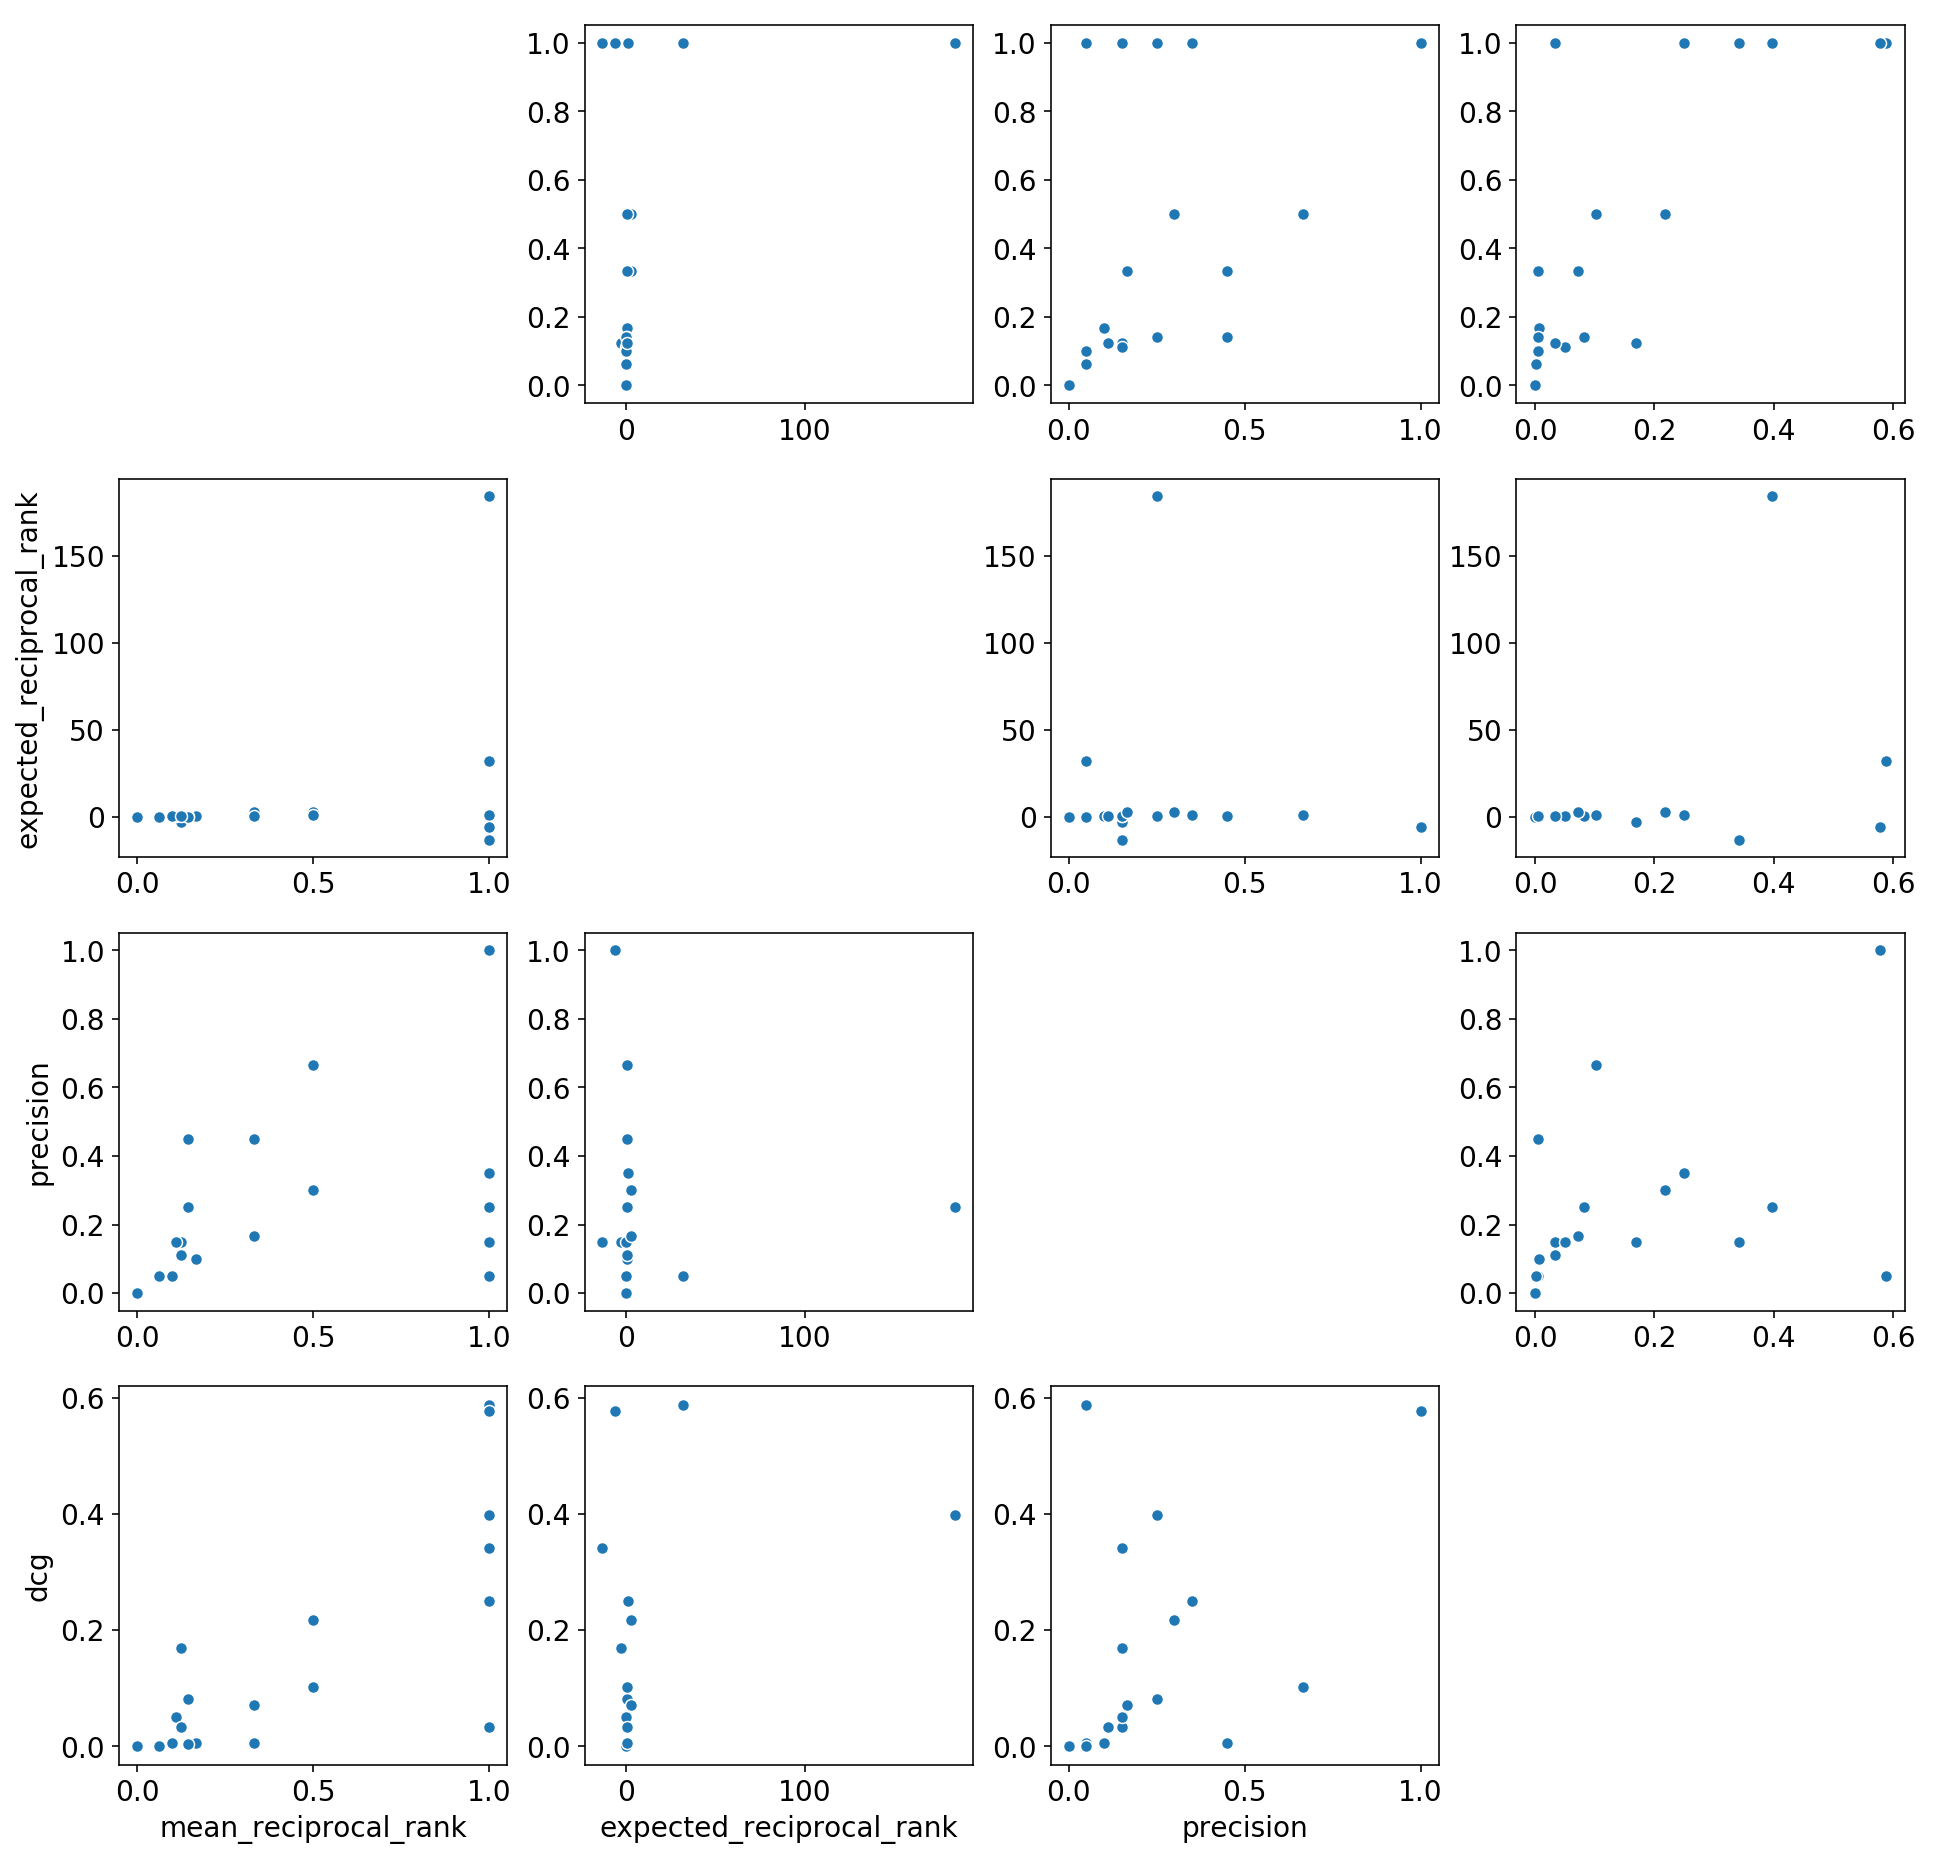

In [116]:
_, axes = plt.subplots(figsize=(16, 16), nrows=4, ncols=4)

for (r, m1), (c, m2) in product(enumerate(METRICS), enumerate(METRICS)):
    ax = axes[r, c]
    if r == c:
        ax.axis('off')
    else:
        sns.scatterplot(
            data=df,
            x='{}.metric_score'.format(m2),
            y='{}.metric_score'.format(m1),
            ax=ax
        )
        ax.set_xlabel(m2)
        ax.set_ylabel(m1)
    
    if r < len(METRICS) - 1:
        ax.set_xlabel('')
    if c > 0:
        ax.set_ylabel('')

## Sorted by NDCG

In [117]:
df.sort_values('dcg.metric_score', ascending=False)[['name', 'dcg.metric_score', 'dcg.unrated_docs', 'dcg.num_hits']]

,name,dcg.metric_score,dcg.unrated_docs,dcg.num_hits
13,giving-feedback,0.588079,19,20
19,injecteren,0.577751,0,4
1,noteren-van-muziek,0.397730,15,20
2,noten-schrijven,0.341418,17,20
7,didactiek,0.249438,13,20
15,depression,0.217776,7,10
0,feedback-geven,0.168915,17,20
18,depressiviteit,0.101674,1,3
4,gene,0.081522,15,20
8,epidemiologie,0.071944,5,6


# Sorted by ERR

In [118]:
df.sort_values('expected_reciprocal_rank.metric_score', ascending=False)[[
    'name',
    'expected_reciprocal_rank.metric_score',
    'expected_reciprocal_rank.unrated_docs',
    'expected_reciprocal_rank.num_hits'
]]

,name,expected_reciprocal_rank.metric_score,expected_reciprocal_rank.unrated_docs,expected_reciprocal_rank.num_hits
1,noteren-van-muziek,184.231479,15,20
13,giving-feedback,31.968750,19,20
8,epidemiologie,2.656250,5,6
15,depression,2.546674,7,10
7,didactiek,1.078516,13,20
18,depressiviteit,0.671549,1,3
4,gene,0.604057,15,20
5,depressie,0.349682,17,20
14,depressief,0.246094,8,9
17,harmonie,0.141955,11,20


# Title & keyword search only

In [119]:
rows = defaultdict(dict)
for metric in METRICS:
    with open('query-results.freeze-2-tk.k-20.{}.json'.format(metric)) as stream:
        results = json.load(stream)
    
    for k, v in results['details'].items():
        row = rows[k]
        row['{}.mean_metric_score'.format(metric)] = results['metric_score']
        row['{}.metric_score'.format(metric)] = v['metric_score']
        row['{}.num_hits'.format(metric)] = len(v['hits'])
        
        for detail_key, detail_value in v['metric_details'][metric].items():
            row['{}.{}'.format(metric, detail_key)] = detail_value

df_tk = pd.DataFrame([assoc(v, 'name', k) for k, v in rows.items()])

## Sorted by ERR - title & keyword

In [122]:
df_tk.sort_values('expected_reciprocal_rank.metric_score', ascending=False)[[
    'name',
    'expected_reciprocal_rank.metric_score',
    'expected_reciprocal_rank.unrated_docs',
    'expected_reciprocal_rank.num_hits'
]]

,name,expected_reciprocal_rank.metric_score,expected_reciprocal_rank.unrated_docs,expected_reciprocal_rank.num_hits
7,didactiek,18862.059347,4,20
15,depression,7.968750,0,1
6,leren-leren,2.876623,17,20
3,biology-transformation,0.968750,1,2
17,harmonie,0.156250,15,16
12,harmonie-muziek,0.093750,4,5
10,injecties-geven,0.000000,4,4
1,noteren-van-muziek,0.000000,20,20
14,depressief,0.000000,0,0
11,hoe-geef-je-een-injectie,0.000000,20,20
